In [10]:
import numpy as nump;
import matplotlib.pyplot as pplot;
import pandas as p;
#ds=p.read_csv("https://github.com/vjvishaljha/Social-Networks-Ads/blob/master/Social_Network_Ads.csv");
ds=p.read_csv("Social_Network_Ads.csv")
ds

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


C:\Users\hp\AppData\Local\Temp\ipykernel_22580\3525113967.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pplot.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],c=ListedColormap(('red','green'))(i),label=j);


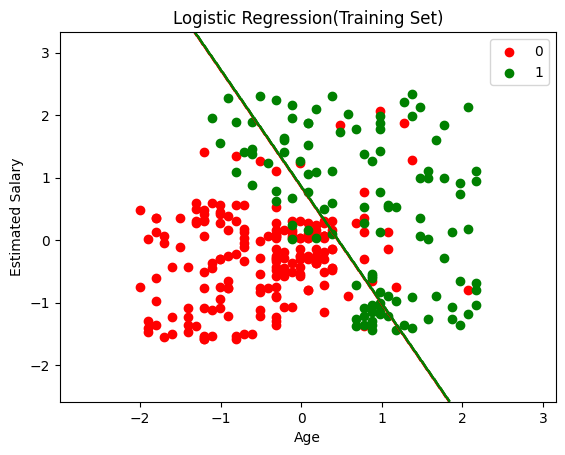

C:\Users\hp\AppData\Local\Temp\ipykernel_22580\3525113967.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  pplot.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],c=ListedColormap(('red','green'))(i),label=j);


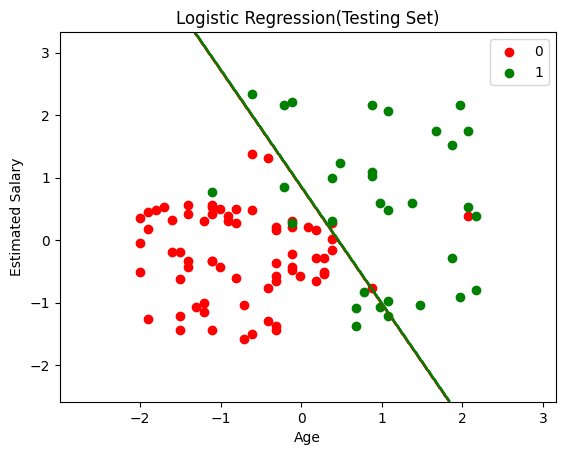

In [11]:
#Splitting Dataset into Training & Testing sets
from sklearn.model_selection import train_test_split;
X=ds.iloc[:,[2,3]].values;
Y=ds.iloc[:,4].values;
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0);
#Feature Scaling
from sklearn.preprocessing import StandardScaler;
sc=StandardScaler();
X_train=sc.fit_transform(X_train);
X_test=sc.transform(X_test);
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression;
log_reg=LogisticRegression(random_state=0);
log_reg.fit(X_train,Y_train);
#Predicting Test-Set Results
y_pred=log_reg.predict(X_test);
#Visualising Training-Set Results
from matplotlib.colors import ListedColormap
X_set,Y_set=X_train,Y_train;
X1,X2=nump.meshgrid(nump.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                    nump.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01));
pplot.contour(X1,X2,log_reg.predict(nump.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')));
pplot.xlim(X1.min(),X1.max());
pplot.ylim(X2.min(),X2.max());
for i,j in enumerate(nump.unique(Y_set)):
  pplot.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],c=ListedColormap(('red','green'))(i),label=j);
pplot.title('Logistic Regression(Training Set)');
pplot.xlabel('Age');
pplot.ylabel('Estimated Salary');
pplot.legend();
pplot.show();
#Visualising Testing-Set Results
X_set,Y_set=X_test,Y_test;
X1,X2=nump.meshgrid(nump.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                    nump.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01));
pplot.contour(X1,X2,log_reg.predict(nump.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')));
pplot.xlim(X1.min(),X1.max());
pplot.ylim(X2.min(),X2.max());
for i,j in enumerate(nump.unique(Y_set)):
  pplot.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],c=ListedColormap(('red','green'))(i),label=j);
pplot.title('Logistic Regression(Testing Set)');
pplot.xlabel('Age');
pplot.ylabel('Estimated Salary');
pplot.legend();
pplot.show();

In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(Y_test,y_pred)
print("confusion matrix: \n",cmat)

confusion matrix: 
 [[65  3]
 [ 8 24]]


In [24]:
tp,fn,fp,tn=confusion_matrix(Y_test,y_pred).reshape(-1)
print("values:\n1.tp = ",tp,"\n2.fn = ",fn,"\n3.fp = ",fp,"\n4.tn = ",tn)

values:
1.tp =  65 
2.fn =  3 
3.fp =  8 
4.tn =  24


In [19]:
#Accuracy
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('Accuracy:\n',format(accuracy_score(Y_test,y_pred)));

Accuracy:
 0.89


In [20]:
#Precision
print('Precision Score:\n',precision_score(Y_test,y_pred));

Precision Score:
 0.8888888888888888


In [21]:
#Recall
print('Recall Score:\n',recall_score(Y_test,y_pred));

Recall Score:
 0.75


In [22]:
#Error Rate
print('Error Rate:\n',((fp+fn)/(tp+fn+fp+tn)));

Error Rate:
 0.11
